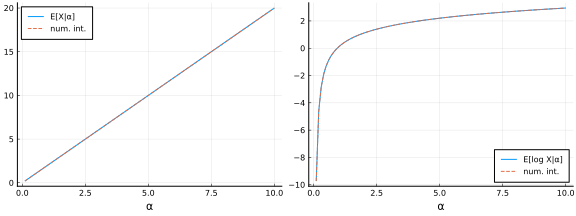

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall D:\.julia\packages\PyCall\BD546\src\numpy.jl:67


In [1]:
using Distributions, SpecialFunctions, QuadGK, Plots
pyplot(fmt = :svg)

α = range(0.1, 10; length=101)
# θ = 2

EX(α) = 2α
ElogX(α) = log(2) + digamma(α) # digamma(x) = ψ(x) = d(log Γ(x))/dx

F(α) = quadgk(x -> x*pdf(Gamma(α, 2.0), x), 0, Inf)[1]
G(α) = quadgk(x -> log(x)*pdf(Gamma(α, 2.0), x), 0, Inf)[1]

y = EX.(α)
z = ElogX.(α)
y_numint = F.(α)
z_numint = G.(α)

P = plot(α, y; label="E[X|α]", xlabel="α", legend=:topleft)
plot!(α, y_numint; label="num. int.", ls=:dash)

Q = plot(α, z; label="E[log X|α]", xlabel="α", legend=:bottomright)
plot!(α, z_numint; label="num. int.", ls=:dash)

plot(P, Q; size=(800, 300))